In [1]:
%%capture
!pip install diffusers transformers

In [2]:
import torch
from diffusers import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
).to("cuda")

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/287 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/635 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/821 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/810 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/613 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [3]:
!wget -O image.png https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png
!wget -O mask.png https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png

--2022-12-23 12:36:05--  https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404753 (395K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>] 395.27K  --.-KB/s    in 0.003s  

2022-12-23 12:36:05 (117 MB/s) - ‘image.png’ saved [404753/404753]

--2022-12-23 12:36:05--  https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conn

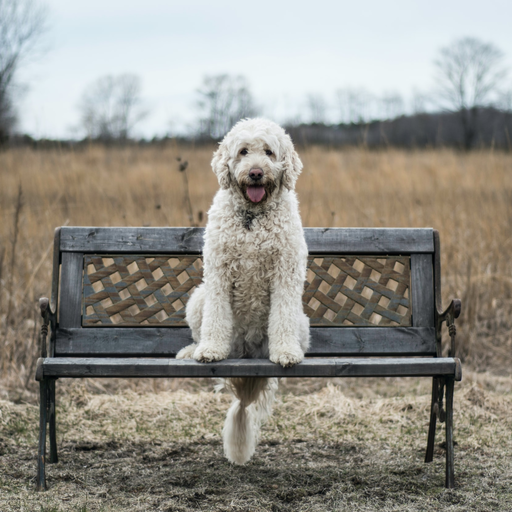

  0%|          | 0/50 [00:00<?, ?it/s]

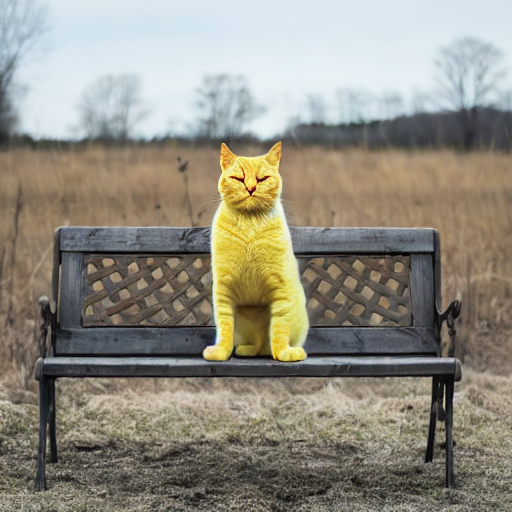

In [4]:
from PIL import Image

image = Image.open("image.png")
mask_image = Image.open("mask.png")

display(image)
display(mask_image)

prompt = "Face of a yellow cat, high resolution, sitting on a park bench"

image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]
image.save("./yellow_cat_on_park_bench.png")
display(image)

In [ ]:
!wget -O interior.jpg https://img.freepik.com/free-photo/gray-sofa-in-white-living-room-interior-with-copy-space-3d-rendering_43614-802.jpg?w=2000

--2022-12-22 14:54:16--  https://img.freepik.com/free-photo/gray-sofa-in-white-living-room-interior-with-copy-space-3d-rendering_43614-802.jpg?w=2000
Resolving img.freepik.com (img.freepik.com)... 92.123.124.69, 2a02:26f0:6d00:6b2::312e, 2a02:26f0:6d00:699::312e
Connecting to img.freepik.com (img.freepik.com)|92.123.124.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225235 (220K) [image/jpeg]
Saving to: ‘interior.jpg’

interior.jpg        100%[===================>] 219.96K   976KB/s    in 0.2s    

2022-12-22 14:54:16 (976 KB/s) - ‘interior.jpg’ saved [225235/225235]



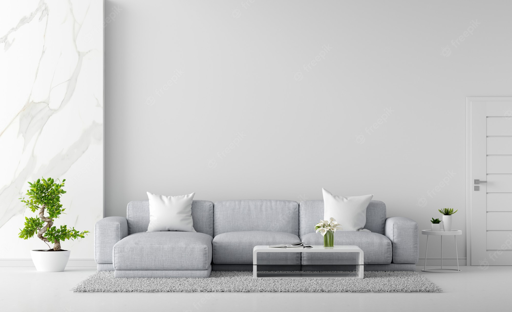

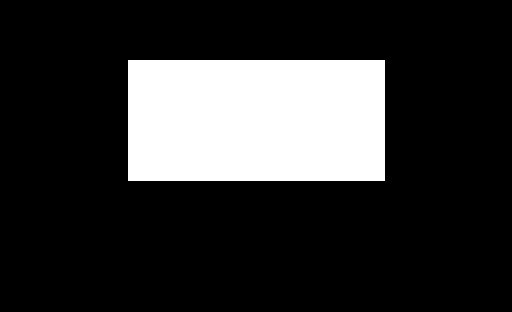

In [ ]:
from PIL import ImageDraw

image = Image.open("interior.jpg").resize((512, 312))
display(image)

mask = Image.new('RGB', image.size)
mask_draw = ImageDraw.Draw(mask)
mask_draw.rectangle((128, 60, 384, 180), fill=(255,255,255))
display(mask)

  0%|          | 0/50 [00:00<?, ?it/s]

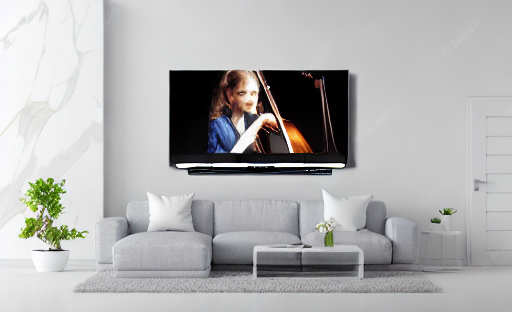

In [ ]:
prompt = "Large television is on the wall, playing cello video"

display(pipe(prompt=prompt, image=image, mask_image=mask, width=512, height=312).images[0])

In [ ]:
!wget -O girl.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/800px-Meisje_met_de_parel.jpg

--2022-12-22 15:00:05--  https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/800px-Meisje_met_de_parel.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175125 (171K) [image/jpeg]
Saving to: ‘girl.jpg’

girl.jpg            100%[===================>] 171.02K  --.-KB/s    in 0.01s   

2022-12-22 15:00:05 (12.5 MB/s) - ‘girl.jpg’ saved [175125/175125]



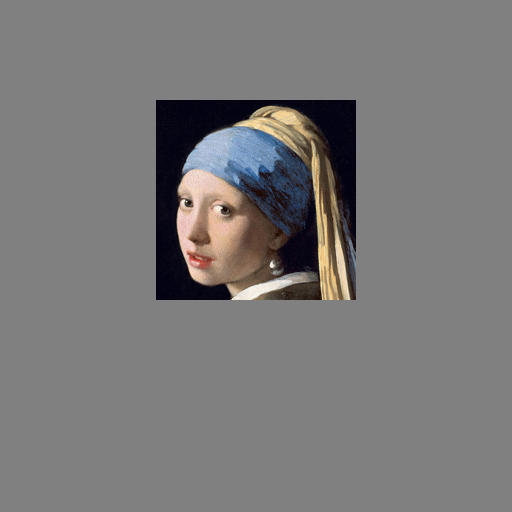

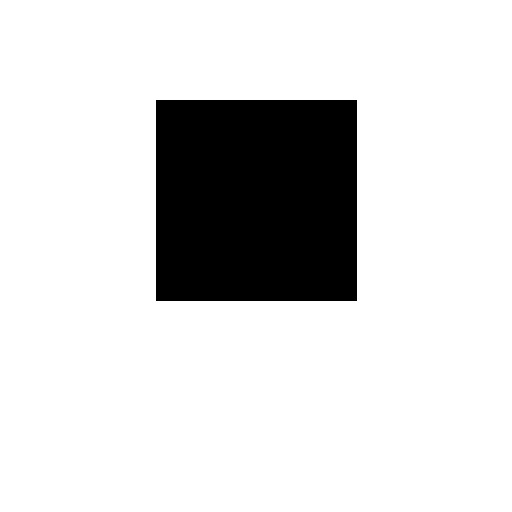

In [ ]:
girl = Image.open("girl.jpg")
image = Image.new("RGB", (512, 512), (128, 128, 128))
image.paste(girl.crop((200, 100, 700, 600)).resize((200, 200)), (156, 100))
mask = Image.new("RGB", (512, 512), (255, 255, 255))
ImageDraw.Draw(mask).rectangle((156, 100, 356, 300), fill=(0,0,0))

display(image)
display(mask)

  0%|          | 0/50 [00:00<?, ?it/s]

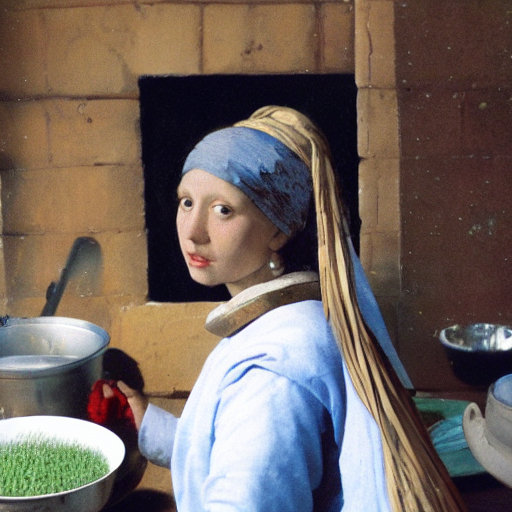

In [ ]:
prompt = "The girl is making rice in the kitchen, middle ages europe"

display(pipe(prompt=prompt, image=image, mask_image=mask).images[0])